# Polynomial regression with Ridge regression

Implementation of polynomial regression with Ridge regression method showing how to do non-linear regression with a linear regression method.

First, we import the packages and generate a dataset with the `make_regression` method, which returns a random linear regression problem, setting 20 samples and 1 feature.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X, y, coef = make_regression(n_samples=20, n_features=1, random_state=0, noise=5.0, coef=True)

Now, we create a Ridge regression model on the sample data with the *alpha* weight 1.

In [2]:
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Let's plot the result of the regression compared to the sample data.

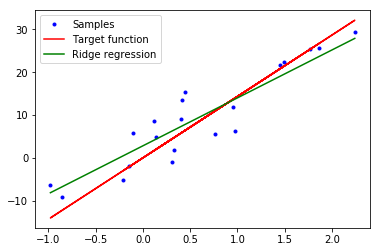

In [3]:
# points useful to plot the regression line
x = np.array([X.min(), X.max()])
plt.plot(X, y, 'b.', label="Samples")

coef_target = coef * X
plt.plot(X, coef_target, 'r-', label="Target function")

coef_ridge = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_ridge, 'g-', label="Ridge regression")

plt.legend(loc='upper left')
plt.show()

We can see the sample dataset (blues dots), the Ridge regression line (green) and the target function (red).

Now, let's do non-linear regression with the Ridge linear model. First, we need a non-linear dataset. The function `generate_points` accepts a *noise* parameter which is used as a the standard deviation of the normal distribution with mean 0.

In [4]:
def generate_points(n, f, noise=None):
    """
    Generates n random points in [0,10] following the function f.
    Optionally, you can provide a noise factor.
    """
    x = np.linspace(0, 10, n*5)
    rng = np.random.RandomState(0)
    rng.shuffle(x)
    x = np.sort(x[:n])
    y = f(x)
    
    if noise is not None:
        y += np.random.normal(0, noise, n)
        
    return x, y

def f(x):
    """ function to approximate """
    return x * np.cos(x)

# generate 20 random points with distribution f and noise factor of 1
x, y = generate_points(20, f, 1)
X = x[:, np.newaxis]

# generate points used to plot
x_plot = np.linspace(0, 10, 100)
X_plot = x_plot[:, np.newaxis]

Let's do a polynomial interpolation with grades in [2, 5] and plot the resulting functions.

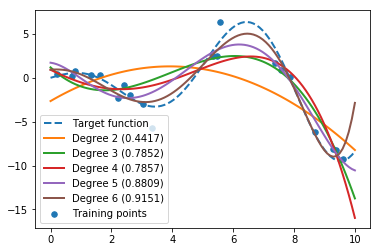

In [5]:
plt.plot(x_plot, f(x_plot), '--', linewidth=2, label="Target function")
plt.scatter(x, y, s=30, marker='o', label="Training points")

for degree in range(2,7):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    score = model.score(X, y)
    score = np.round(score, 4)
    plt.plot(x_plot, y_plot, linewidth=2, label="Degree {} ({})".format(degree, score))

plt.legend(loc='lower left')
plt.show()

We can see the different interpolations based on the polynomial degree. The score is reported right after the degree in the legend. Clearly, incrementing the degree of the polynomial, we fit more the data reducing the error, hence, not surprisingly, the function with the best score is the one with highest degree. Looking at the blue dots representing the training points, we can see the noise factor applied to the dataset.
Now, let's take the function with degree 6 and try to change the regularization parameter alpha. We can do it with a logspace in [10^-3, 10^3].

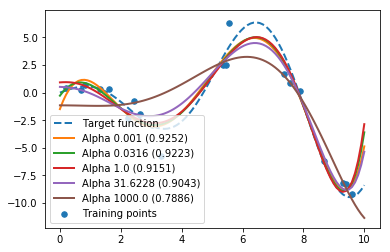

In [6]:
plt.plot(x_plot, f(x_plot), '--', linewidth=2, label="Target function")
plt.scatter(x, y, s=30, marker='o', label="Training points")

for alpha in np.logspace(-3,3,5):
    model = make_pipeline(PolynomialFeatures(6), Ridge(alpha=alpha))
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    score = model.score(X, y)
    score = np.round(score, 4)
    alpha = np.round(alpha, 4)
    plt.plot(x_plot, y_plot, linewidth=2, label="Alpha {} ({})".format(alpha, score))

plt.legend(loc='lower left')
plt.show()

We can see the effect of *alpha*, which almost flatten the function. We can also note that the we have the best score with the lowest *alpha* tested. Indeed, if introduced a noise factor in the data, but probably not sufficient to benefit from the regularization parameter. Maybe, it could be more useful in case of outliers, since it enables a polynomial of high degree not to strictly follow the points in the dataset, but rather find a trend function.

## Future work
Could be good to build an example where to see the benefits of the regularization parameter.

## Reference
* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
* http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html